In [2]:
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append('../src')
from utils import *
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import scipy.stats as stats
import scipy as sp
from scipy.stats import pearsonr,binom,linregress
from ast import literal_eval
import json
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde
os.chdir("..")

In [ ]:
#Print all stats
for mode in ["vision", "imagery"]:
    for method in ["secondsight", "mindeye", "braindiffuser", "tagaki"]:
        directory_path = f"output/mental_imagery_paper/{mode}/{method}/subject1_statistics_12.csv"
        df = pd.read_csv(directory_path)
        # df = column_string_to_list(df)
        for subject in [2,5,7]:
            new_df = pd.read_csv(f"output/mental_imagery_paper/{mode}/{method}/subject{subject}_statistics_12.csv")
        #     # new_df = column_string_to_list(new_df)
            df = pd.concat([df, new_df])

        # df.head(100)
        # print(df)
        df.to_csv(f"output/mental_imagery_paper/{mode}/{method}/all_subject_statistics.csv")

        # Statistical Analysis
        simple = [0,1,2,3,4,5]
        comp = [6,7,8,9,10,11]
        # df_final_samples    = df.loc[(df['Sample Indicator'] == 12)]
        df_final_samples    = df.loc[(df['Sample Indicator'] == 12) & (df['ID'].isin(comp))]
        # df_final_samples    = df.loc[(df['Sample Indicator'] == 12) & (df['ID'].isin(simple))]
        print(f"### {method} {mode}")
        print(df_final_samples['Pixel Correlation'].mean())
        # print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
        print(df_final_samples['SSIM'].mean())
        # print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
        print(df_final_samples['AlexNet 2'].mean())
        print(df_final_samples['AlexNet 5'].mean())
        print(df_final_samples['AlexNet 7'].mean())
        print(df_final_samples['CLIP Two-way'].mean())
        print(df_final_samples['CLIP Cosine'].mean())
        # print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
        print(df_final_samples['Inception V3'].mean())
        print(df_final_samples['EffNet-B'].mean())
        print(df_final_samples['SwAV'].mean())
        print(df_final_samples['Brain Correlation V1'].mean())
        print(df_final_samples['Brain Correlation V2'].mean())
        print(df_final_samples['Brain Correlation V3'].mean())
        print(df_final_samples['Brain Correlation V4'].mean())
        print(df_final_samples['Brain Correlation Higher Visual'].mean())
        print(df_final_samples['Brain Correlation NSD General'].mean())
        print(df_final_samples['AlexNet 2 1000'].mean())
        print(df_final_samples['AlexNet 5 1000'].mean())
        print(df_final_samples['AlexNet 7 1000'].mean())
        print(df_final_samples['CLIP Two-way 1000'].mean())
        print(df_final_samples['Inception V3 1000'].mean())
        print("\n")
        
        if method != "secondsight":
            # df_final_samples    = df.loc[(df['Sample Indicator'] == 11)]
            df_final_samples    = df.loc[(df['Sample Indicator'] == 11) & (df['ID'].isin(comp))]
            # df_final_samples    = df.loc[(df['Sample Indicator'] == 11) & (df['ID'].isin(simple))]
            print(f"### {method} {mode} LOW")
            print(df_final_samples['Pixel Correlation'].mean())
            # print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
            print(df_final_samples['SSIM'].mean())
            # print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
            print(df_final_samples['AlexNet 2'].mean())
            print(df_final_samples['AlexNet 5'].mean())
            print(df_final_samples['AlexNet 7'].mean())
            print(df_final_samples['CLIP Two-way'].mean())
            print(df_final_samples['CLIP Cosine'].mean())
            # print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
            print(df_final_samples['Inception V3'].mean())
            print(df_final_samples['EffNet-B'].mean())
            print(df_final_samples['SwAV'].mean())
            print(df_final_samples['Brain Correlation V1'].mean())
            print(df_final_samples['Brain Correlation V2'].mean())
            print(df_final_samples['Brain Correlation V3'].mean())
            print(df_final_samples['Brain Correlation V4'].mean())
            print(df_final_samples['Brain Correlation Higher Visual'].mean())
            print(df_final_samples['Brain Correlation NSD General'].mean())
            print(df_final_samples['AlexNet 2 1000'].mean())
            print(df_final_samples['AlexNet 5 1000'].mean())
            print(df_final_samples['AlexNet 7 1000'].mean())
            print(df_final_samples['CLIP Two-way 1000'].mean())
            print(df_final_samples['Inception V3 1000'].mean())
            print("\n")

In [37]:

# Mental Imagery Paper
# method = "secondsight"
# method = "mindeye"
# method = "braindiffuser"
# method = "tagaki"
# mode = "vision"

df = pd.DataFrame()
for mode in ["vision", "imagery"]:
    for method in ["secondsight", "mindeye", "braindiffuser"]:
        for subject in [1,2,5,7]:
            # new_df = pd.read_csv(f"output/mental_imagery_paper/{mode}/{method}/subject{subject}_statistics_12.csv")
            new_df = pd.read_csv(f"output/mental_imagery_paper/{mode}/{method}/subject{subject}_statistics_12.csv")
            df = pd.concat([df, new_df])

df.to_csv(f"output/mental_imagery_paper/all_statistics_no_tagaki.csv")
# df = pd.read_csv(f"output/mental_imagery_paper/all_statistics_no_tagaki.csv")

In [ ]:
# Statistical Analysis
simple = [0,1,2,3,4,5]
comp = [6,7,8,9,10,11]
df_final_samples    = df.loc[(df['Sample Indicator'] == 12)]
# df_final_samples    = df.loc[(df['Sample Indicator'] == 11) & (df['ID'].isin(comp))]
# df_final_samples    = df.loc[(df['Sample Indicator'] == 11) & (df['ID'].isin(simple))]

print(df_final_samples['Pixel Correlation'].mean())
# print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['SSIM'].mean())
# print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['AlexNet 2'].mean())
print(df_final_samples['AlexNet 5'].mean())
print(df_final_samples['AlexNet 7'].mean())
print(df_final_samples['CLIP Two-way'].mean())
print(df_final_samples['CLIP Cosine'].mean())
# print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['Inception V3'].mean())
print(df_final_samples['EffNet-B'].mean())
print(df_final_samples['SwAV'].mean())
print(df_final_samples['Brain Correlation V1'].mean())
print(df_final_samples['Brain Correlation V2'].mean())
print(df_final_samples['Brain Correlation V3'].mean())
print(df_final_samples['Brain Correlation V4'].mean())
print(df_final_samples['Brain Correlation Higher Visual'].mean())
print(df_final_samples['Brain Correlation NSD General'].mean())
print(df_final_samples['AlexNet 2 1000'].mean())
print(df_final_samples['AlexNet 5 1000'].mean())
print(df_final_samples['AlexNet 7 1000'].mean())
print(df_final_samples['CLIP Two-way 1000'].mean())
print(df_final_samples['Inception V3 1000'].mean())

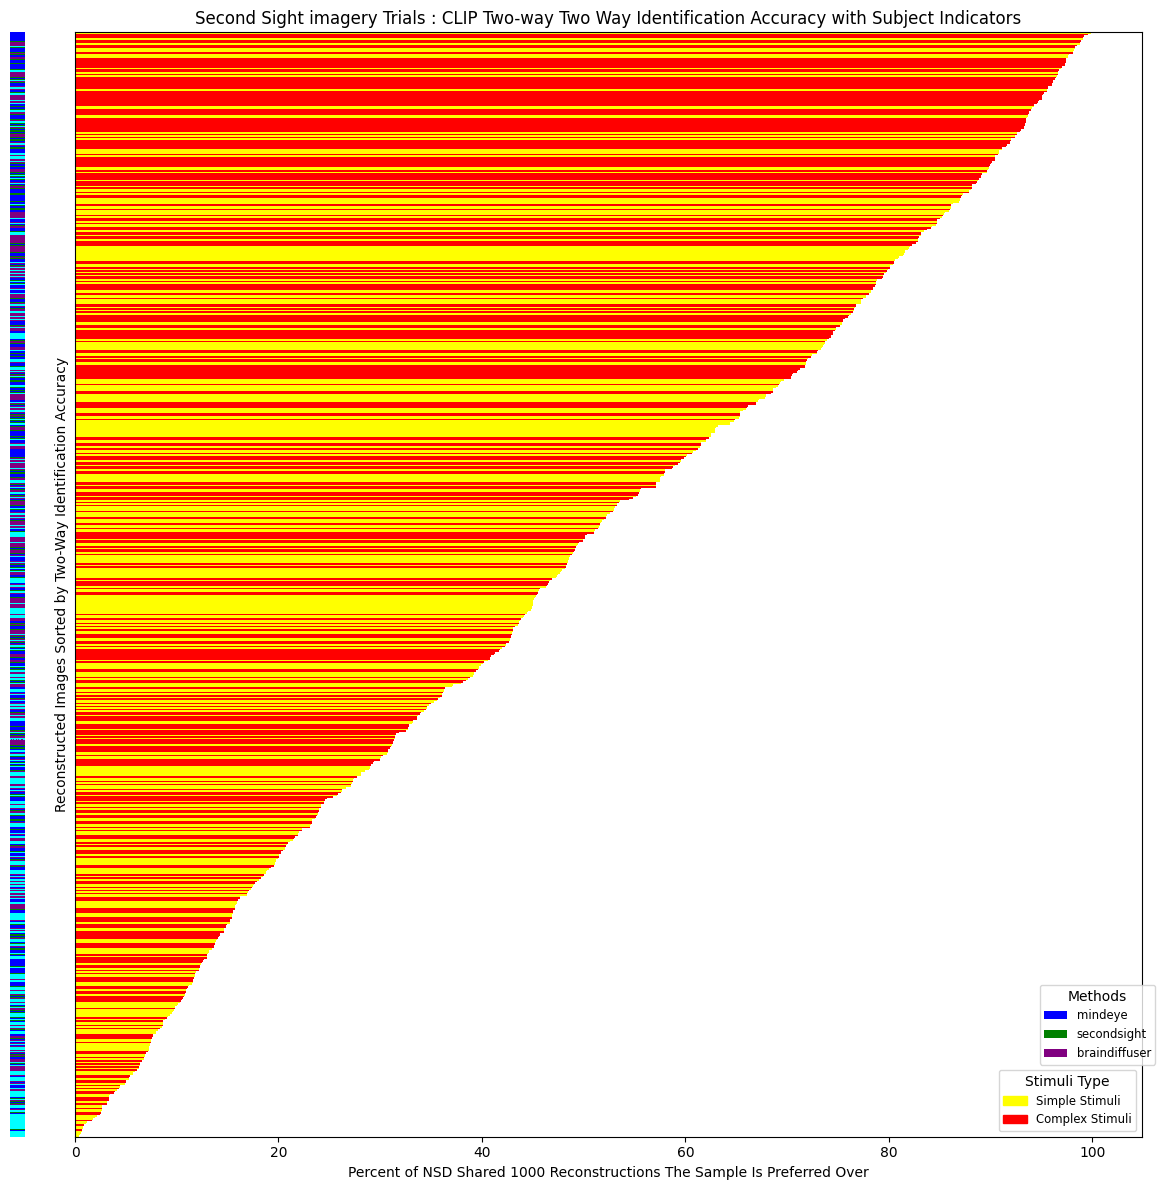

In [38]:
# Update the sort order to ascending=True
# Filter and sort the dataframe
# mode = "vision"
mode = "imagery"
# feature = "Inception V3 1000"
# feature = "AlexNet 2 1000"
# feature = "AlexNet 5 1000"
# feature = "AlexNet 7 1000"
feature = "CLIP Two-way 1000"
feature_name = " ".join(feature.split()[:-1])

filtered_sorted_with_subject_df = df[(df['Sample Indicator'] == 12) & (df['Mode'] == mode)].dropna(subset=[feature])
filtered_sorted_with_subject_df = filtered_sorted_with_subject_df.sort_values(by=feature, ascending=False)

# Define unique subjects and their colors
unique_subjects = filtered_sorted_with_subject_df['Method'].unique()
subject_colors = ListedColormap(['blue', 'green', 'purple', 'cyan'])  # Bright color map
subject_color_map = {subject: idx for idx, subject in enumerate(unique_subjects)}

# Create the subject indicator matrix
subject_indicator_matrix = np.array([subject_color_map[subj] for subj in filtered_sorted_with_subject_df['Method']])

# Create the main figure and axes
fig, ax = plt.subplots(figsize=(13, 12))

# Plot the horizontal bars with no gaps in between by setting the height of each bar to 1
bar_colors = ['yellow' if ID <= 5 else 'red' for ID in filtered_sorted_with_subject_df['ID']]
ax.barh(
    y=range(len(filtered_sorted_with_subject_df)), 
    width=filtered_sorted_with_subject_df[feature] * 100,  # Scale the width to match the matrix plot scale
    height=1,  # Set the bar height to 1 to have the bars touch each other
    color=bar_colors,
    edgecolor='none'
)

# Reduce the margins to minimize empty space
ax.margins(y=0)  # Reduce margin to 0 on the y-axis

# Create a separate axis for the subject indicator, moving it further away from the main plot
divider = make_axes_locatable(ax)
ax_subject = divider.append_axes("left", size=0.15, pad=0.5, sharey=ax)  # Increase pad to move it away from the main plot

# Plot the subject indicator
ax_subject.imshow(subject_indicator_matrix[:, None], cmap=subject_colors, aspect='auto')

# Hide the spines, ticks, and labels for the subject indicator axis
ax_subject.set_xticks([])
ax_subject.set_yticks([])
ax_subject.set_yticklabels([])
for spine in ax_subject.spines.values():
    spine.set_visible(False)

# Set the labels and title for the main axis
ax.set_xlabel("Percent of NSD Shared 1000 Reconstructions The Sample Is Preferred Over")
ax.set_ylabel("Reconstructed Images Sorted by Two-Way Identification Accuracy")
ax.set_title(f"Second Sight {mode} Trials : {feature_name} Two Way Identification Accuracy with Subject Indicators")

# Create the legends
legend_elements_main = [
    mpatches.Patch(color='yellow', label='Simple Stimuli'),
    mpatches.Patch(color='red', label='Complex Stimuli')
]
ax.legend(handles=legend_elements_main, loc='lower right', fontsize='small', title="Stimuli Type")

# Reposition the Subjects legend to the bottom of the figure
legend_elements_subject = [mpatches.Patch(facecolor=subject_colors(i), label=f'{subj}') for i, subj in enumerate(unique_subjects)]
subject_legend = ax_subject.legend(handles=legend_elements_subject, loc='lower center', bbox_to_anchor=(72.5, 0.06), fontsize='small', title="Methods")

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

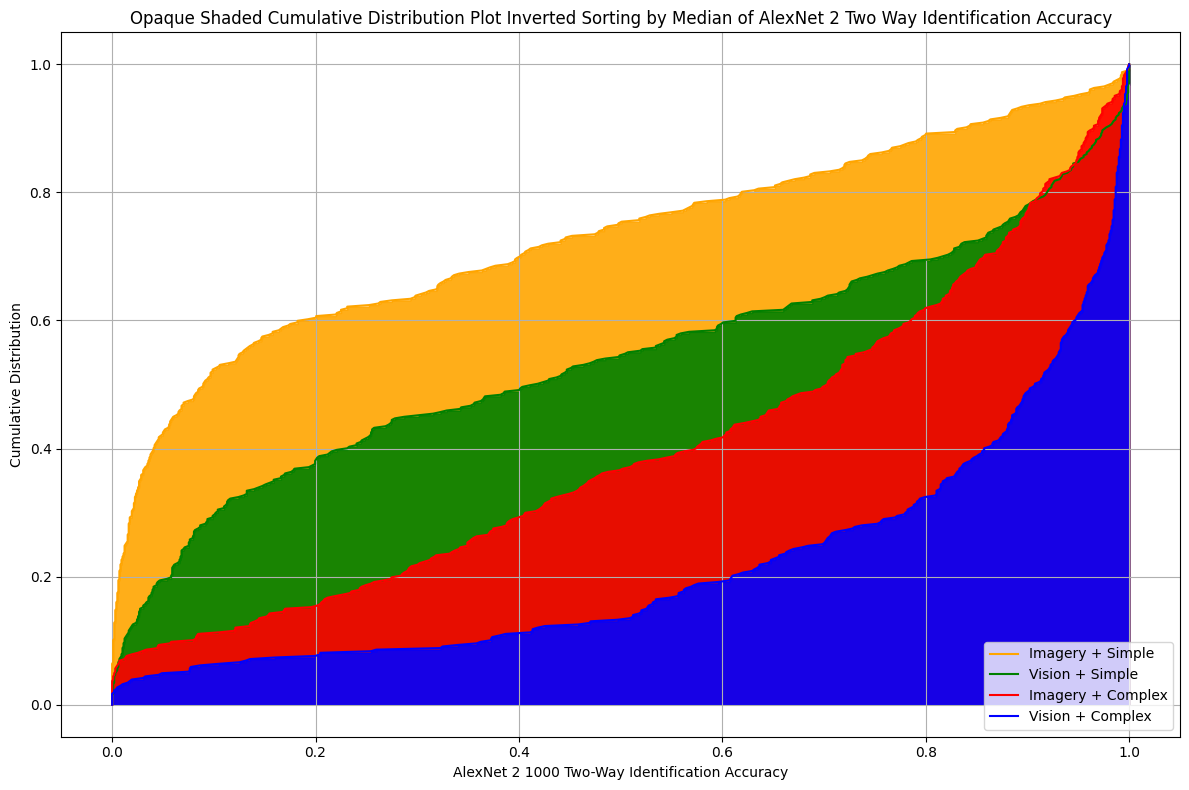

In [17]:
# Define the feature of interest
# feature = "Inception V3 1000"
feature = "AlexNet 2 1000"
# feature = "AlexNet 5 1000"
# feature = "AlexNet 7 1000"
# feature = "CLIP Two-way 1000"

feature_name = " ".join(feature.split()[:-1])

# Function to plot with fill and increased opacity
def plot_with_fill_opaque(x, y, label, color):
    plt.fill_between(x, 0, y, step='post', alpha=0.9, color=color)  # Increased opacity
    plt.plot(x, y, label=label, color=color)

# Function to calculate cumulative distribution
def cumulative_distribution(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate cumulative probability for each value in the sorted array
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    return data_sorted, p

# Define the feature of interest and drop NaN values for the feature of interest
df_clean = df.dropna(subset=[feature])

# Separate the data into four groups
vision_complex = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] > 5)][feature]
vision_simple = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] <= 5)][feature]
imagery_complex = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] > 5)][feature]
imagery_simple = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] <= 5)][feature]

# Calculate cumulative distributions for each group
vision_complex_sorted, p_vision_complex = cumulative_distribution(vision_complex)
vision_simple_sorted, p_vision_simple = cumulative_distribution(vision_simple)
imagery_complex_sorted, p_imagery_complex = cumulative_distribution(imagery_complex)
imagery_simple_sorted, p_imagery_simple = cumulative_distribution(imagery_simple)

# Inverting the sorting order of the cumulative distributions by their median values for plotting
sorted_distributions_median_inverted = sorted([(vision_complex_sorted, p_vision_complex, 'Vision + Complex', 'blue'),
                                               (vision_simple_sorted, p_vision_simple, 'Vision + Simple', 'green'),
                                               (imagery_complex_sorted, p_imagery_complex, 'Imagery + Complex', 'red'),
                                               (imagery_simple_sorted, p_imagery_simple, 'Imagery + Simple', 'orange')],
                                              key=lambda x: np.median(x[0]), reverse=False)

# Plotting with filled areas and increased opacity
plt.figure(figsize=(12, 8))
for dist in sorted_distributions_median_inverted:
    plot_with_fill_opaque(dist[0], dist[1], dist[2], dist[3])

# Adding labels and title
feature_name = " ".join(feature.split()[:-1])
plt.xlabel(f'{feature} Two-Way Identification Accuracy')
plt.ylabel('Cumulative Distribution')
plt.title(f'Opaque Shaded Cumulative Distribution Plot Inverted Sorting by Median of {feature_name} Two Way Identification Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"output/mental_imagery_paper/figures/density_{feature_name}_no_tagaki.png")
plt.show()


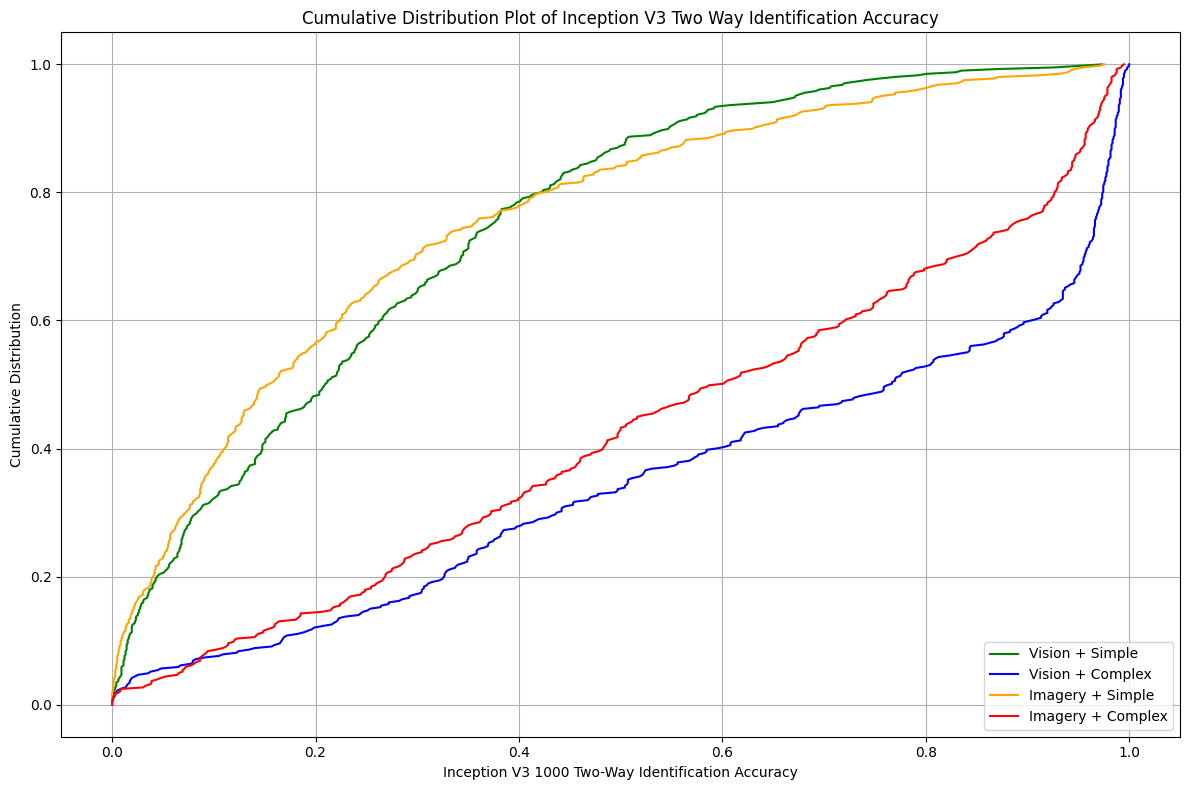

In [39]:
# Define the feature of interest
feature = "Inception V3 1000"
# feature = "AlexNet 2 1000"
# feature = "AlexNet 5 1000"
# feature = "AlexNet 7 1000"
# feature = "CLIP Two-way 1000"

feature_name = " ".join(feature.split()[:-1])


# Drop NaN values for the feature of interest
df_clean = df.dropna(subset=[feature])

# Separate the data into four groups
vision_complex = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] > 5)][feature]
vision_simple = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] <= 5)][feature]
imagery_complex = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] > 5)][feature]
imagery_simple = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] <= 5)][feature]

# Function to calculate cumulative distribution
def cumulative_distribution(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate cumulative probability for each value in the sorted array
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    return data_sorted, p

# Calculate cumulative distributions for each group
vision_complex_sorted, p_vision_complex = cumulative_distribution(vision_complex)
vision_simple_sorted, p_vision_simple = cumulative_distribution(vision_simple)
imagery_complex_sorted, p_imagery_complex = cumulative_distribution(imagery_complex)
imagery_simple_sorted, p_imagery_simple = cumulative_distribution(imagery_simple)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(vision_simple_sorted, p_vision_simple, color='green', label='Vision + Simple')
plt.plot(vision_complex_sorted, p_vision_complex, color='blue', label='Vision + Complex')
plt.plot(imagery_simple_sorted, p_imagery_simple, color='orange', label='Imagery + Simple')
plt.plot(imagery_complex_sorted, p_imagery_complex, color='red', label='Imagery + Complex')

# Adding labels and title
plt.xlabel(f'{feature} Two-Way Identification Accuracy')
plt.ylabel('Cumulative Distribution')
plt.title(f'Cumulative Distribution Plot of {feature_name} Two Way Identification Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()


In [45]:
feature_dict = {}
feature_dict = {"vision_complex": [], "vision_simple": [], "imagery_complex": [], "imagery_simple": []}
net_list = [
            'AlexNet 1',
            'AlexNet 2',
            'AlexNet 3',
            'AlexNet 4',
            'AlexNet 5',
            'AlexNet 6',
            'AlexNet 7']
print(df)
for feature in net_list:
    df_clean = df.dropna(subset=[f'{feature} 1000'])
    print(df_clean)
    # Separate the data into four groups
    vision_complex = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] > 5)][f'{feature} 1000']
    vision_simple = df_clean[(df_clean['Mode'] == 'vision') & (df_clean['ID'] <= 5)][f'{feature} 1000']
    imagery_complex = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] > 5)][f'{feature} 1000']
    imagery_simple = df_clean[(df_clean['Mode'] == 'imagery') & (df_clean['ID'] <= 5)][f'{feature} 1000']

    # Calculate cumulative distributions for each group
    vision_complex_sorted, p_vision_complex = cumulative_distribution(vision_complex)
    vision_simple_sorted, p_vision_simple = cumulative_distribution(vision_simple)
    imagery_complex_sorted, p_imagery_complex = cumulative_distribution(imagery_complex)
    imagery_simple_sorted, p_imagery_simple = cumulative_distribution(imagery_simple)

    # Normalize the sorted data to 1
    vision_complex_sorted_normalized = vision_complex_sorted / vision_complex_sorted.max()
    vision_simple_sorted_normalized = vision_simple_sorted / vision_simple_sorted.max()
    imagery_complex_sorted_normalized = imagery_complex_sorted / imagery_complex_sorted.max()
    imagery_simple_sorted_normalized = imagery_simple_sorted / imagery_simple_sorted.max()

    # Calculate the area under each normalized curve using the trapezoidal rule
    area_vision_complex = np.trapz(p_vision_complex, vision_complex_sorted_normalized)
    area_vision_simple = np.trapz(p_vision_simple, vision_simple_sorted_normalized)
    area_imagery_complex = np.trapz(p_imagery_complex, imagery_complex_sorted_normalized)
    area_imagery_simple = np.trapz(p_imagery_simple, imagery_simple_sorted_normalized)
    feature_dict["vision_complex"].append(area_vision_complex)
    feature_dict["vision_simple"].append(area_vision_simple)
    feature_dict["imagery_complex"].append(area_imagery_complex)
    feature_dict["imagery_simple"].append(area_imagery_simple)
    
plt.figure(figsize=(12, 8))
plt.plot(feature_dict["vision_simple"], color='green', label='Vision + Simple', marker='o', linewidth=2)
plt.plot(feature_dict["vision_complex"], color='blue', label='Vision + Complex', marker='o', linewidth=2)
plt.plot(feature_dict["imagery_simple"], color='orange', label='Imagery + Simple', marker='o', linewidth=2)
plt.plot(feature_dict["imagery_complex"], color='red', label='Imagery + Complex', marker='o', linewidth=2)

# Adding labels and title
plt.xlabel("AlexNet Layer")
plt.ylabel('Normalized AUC for Cumulative Two-Way Identification Distribution')
plt.title(f'Two-Way Identification AUC Across AlexNet Layers')
plt.legend(loc='upper right')
plt.xticks(range(7), fontsize=9)
plt.grid(True)
plt.tight_layout()

Empty DataFrame
Columns: [Unnamed: 0, ID, Subject, Method, Mode, Sample Count, Batch Number, Sample Indicator, Strength, Brain Correlation V1, Brain Correlation V2, Brain Correlation V3, Brain Correlation V4, Brain Correlation Early Visual, Brain Correlation Higher Visual, Brain Correlation NSD General, SSIM, Pixel Correlation, CLIP Cosine, CLIP Two-way, AlexNet 1, AlexNet 2, AlexNet 2.1, AlexNet 4, AlexNet 5, AlexNet 6, AlexNet 7, Inception V3, EffNet-B, SwAV, CLIP Two-way 1000, AlexNet 1 1000, AlexNet 2 1000, AlexNet 3 1000, AlexNet 4 1000, AlexNet 5 1000, AlexNet 6 1000, AlexNet 7 1000, Inception V3 1000, AlexNet 3]
Index: []

[0 rows x 40 columns]


ValueError: zero-size array to reduction operation maximum which has no identity

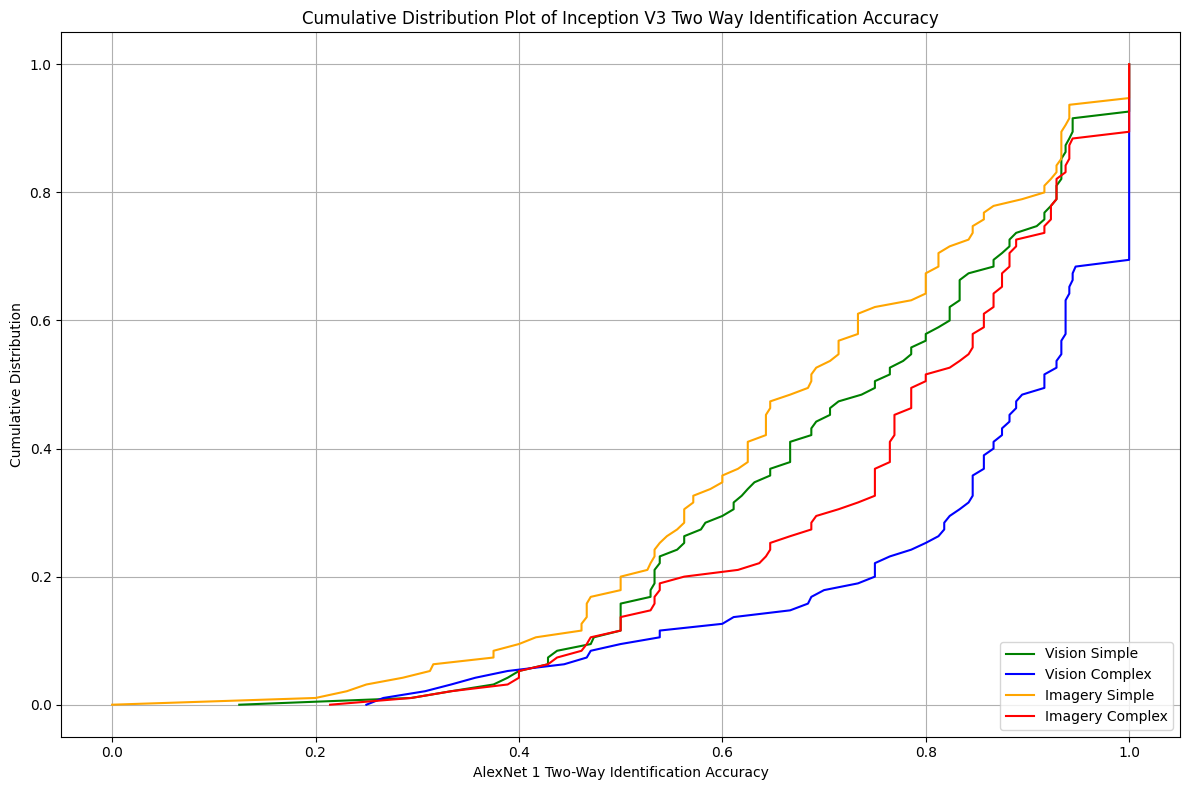

In [44]:
human_df = pd.read_csv(f'experiments/dataframes/responses_v4_clean.csv')

grouped_data = human_df.groupby(['sample', 'subject', 'method', 'stimtype', 'mode'])['picked_target'].mean().reset_index()
grouped_data.rename(columns={'picked_target': 'Accuracy'}, inplace=True)

# Separate the data into the four groups
vision_complex = grouped_data[(grouped_data['mode'] == 'vision') & (grouped_data['stimtype'] == 'complex')]['Accuracy']
vision_simple = grouped_data[(grouped_data['mode'] == 'vision') & (grouped_data['stimtype'] == 'simple')]['Accuracy']
imagery_complex = grouped_data[(grouped_data['mode'] == 'imagery') & (grouped_data['stimtype'] == 'complex')]['Accuracy']
imagery_simple = grouped_data[(grouped_data['mode'] == 'imagery') & (grouped_data['stimtype'] == 'simple')]['Accuracy']

# Calculate cumulative distributions for each group using the previously defined function
vision_complex_sorted, p_vision_complex = cumulative_distribution(vision_complex)
vision_simple_sorted, p_vision_simple = cumulative_distribution(vision_simple)
imagery_complex_sorted, p_imagery_complex = cumulative_distribution(imagery_complex)
imagery_simple_sorted, p_imagery_simple = cumulative_distribution(imagery_simple)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(vision_simple_sorted, p_vision_simple, color='green', label='Vision Simple')
plt.plot(vision_complex_sorted, p_vision_complex, color='blue', label='Vision Complex')
plt.plot(imagery_simple_sorted, p_imagery_simple, color='orange', label='Imagery Simple')
plt.plot(imagery_complex_sorted, p_imagery_complex, color='red', label='Imagery Complex')


# Adding labels and title
plt.xlabel(f'Human Two-Way Identification Accuracy')
plt.ylabel('Cumulative Distribution')
plt.title(f'Cumulative Distribution Plot of Human Two Way Identification Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()


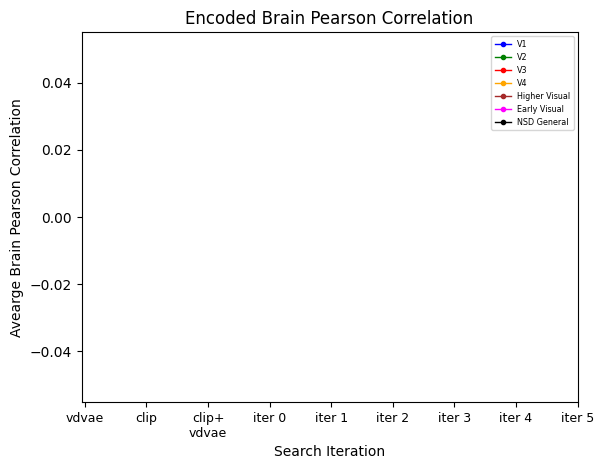

In [11]:
# Average Iteration Brain Region Plot

import matplotlib.pyplot as plt

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]

for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    

# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), color = 'blue', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), color = 'green', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), color = 'red',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), color = 'orange',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), color = 'brown', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(),  color = 'magenta',linestyle = 'dashed', linewidth=1)
plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean(), color = 'black', linestyle = 'dashed', linewidth=1)

plt.plot(brain_correlation_V1, marker='.', color = 'blue', label = 'V1', linewidth=1)
plt.plot(brain_correlation_V2, marker='.', color = 'green',label = 'V2', linewidth=1)
plt.plot(brain_correlation_V3, marker='.', color = 'red',  label = 'V3', linewidth=1)
plt.plot(brain_correlation_V4, marker='.', color = 'orange', label = 'V4', linewidth=1)
plt.plot(brain_correlation_higher_visual, marker='.', color = 'brown', label = 'Higher Visual', linewidth=1)
plt.plot(brain_correlation_early_visual, marker='.',  color = 'magenta', label = 'Early Visual', linewidth=1)
plt.plot(brain_correlation_unmasked, marker='.',  color = 'black', label = 'NSD General', linewidth=1)
plt.xticks(range(len(x)), x,fontsize=9)

plt.legend(fontsize = "xx-small")
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 300


In [ ]:
# Average Iteration Brain Region Plot

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

y_v1 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean()
y_v2 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean()
y_v3 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean()
y_v4 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean()
y_ev = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean()
y_hv = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean()
y_unmasked = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean()

v1_set = True
v2_set = True
v3_set = True
v4_set = True
ev_set = True
hv_set = True
unmasked_set = True

x_v1 = 0 
x_v2 = 0 
x_v3 = 0 
x_v4 = 0 
x_ev = 0 
x_hv = 0 
x_umasked = 0 

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
iteration = 0


for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    
    if(iteration_val_v1 > y_v1 and v1_set):
        x_v1 = iteration - 1
        v1_set = False
        
    if(iteration_val_v2 > y_v2 and v2_set):
        x_v2 = iteration - 1
        v2_set = False
        
    if(iteration_val_v3 > y_v3 and v3_set):
        x_v3 = iteration - 1
        v3_set = False
        
    if(iteration_val_v4 > y_v4 and v4_set):
        x_v4 = iteration - 1
        v4_set = False
        
    if(iteration_val_ev > y_ev and ev_set):
        x_ev = iteration - 1
        ev_set = False
        
    if(iteration_val_hv > y_hv and hv_set):
        x_hv = iteration - 1
        hv_set = False
        
    if(iteration_val_unmasked > y_unmasked and unmasked_set):
        x_unmasked = iteration - 1
        unmasked_set = False
        
    iteration += 1
    
# print(df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean())
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')


N = 9
#x = np.array([0,1,2,3,4,5,6,7,8,9])
# y = np.array(brain_correlation_unmasked)
# a, b = np.polyfit(x, brain_correlation_unmasked, deg=1)
# y_est = a * x + b
# y_err = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
# print(y_err[0])
# print(y_err[1])

y_un = np.array(brain_correlation_unmasked)
ci_un = 0.95 * np.std(y_un) / math.sqrt(N)


# def mean_confidence_interval(data, confidence=0.95):
#     a = 1.0 * np.array(data)
#     n = len(a)
#     m, se = np.mean(a), scipy.stats.sem(a)
#     h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h

# mean, lower, upper = [],[],[]
# ci = 0.95

# m, ml, mu = mean_confidence_interval(y, ci)
# mean.append(m)
# lower.append(ml)
# upper.append(mu)


plt.plot(brain_correlation_V1, marker='.', label = 'V1', linewidth=1, color = "royalblue")
plt.plot(brain_correlation_V2, marker='.', label = 'V2', linewidth=1, color = "darkviolet")
plt.plot(brain_correlation_V3, marker='.', label = 'V3', linewidth=1, color = "red")
plt.plot(brain_correlation_V4, marker='.', label = 'V4', linewidth=1, color = "forestgreen")
#plt.plot(brain_correlation_early_visual, marker='.', label = 'Early Visual', linewidth=1, color = "red")
plt.plot(brain_correlation_higher_visual, marker='.', label = 'Higher Visual', linewidth=1, color = "darkorange")
plt.plot(brain_correlation_unmasked, marker='.', label = 'NSD General', linewidth=1, color = "black")
plt.xticks(range(len(x)), x,fontsize=9)
# plt.fill_between(x, y_err[0], y_err[0], color='dimgray', alpha=0.2)
# plt.fill_between(x, upper, lower, color='dimgray', alpha=0.2)
plt.fill_between(x, (y_un-ci_un), (y_un+ci_un), color='black', alpha=.2)
# plt.fill_between(x, (y_hi-ci_hi), (y_hi+ci_hi), color='darkorange', alpha=.2)
# plt.fill_between(x, (y_er-ci_er), (y_er+ci_er), color='red', alpha=.2)
# plt.fill_between(x, (y_vo-ci_vo), (y_vo+ci_vo), color='royalblue', alpha=.2)
# plt.fill_between(x, (y_vt-ci_vt), (y_vt+ci_vt), color='darkviolet', alpha=.2)
# plt.fill_between(x, (y_vth-ci_vth), (y_vth+ci_vth), color='violet', alpha=.2)
# plt.fill_between(x, (y_vf-ci_vf), (y_vf+ci_vf), color='forestgreen', alpha=.2)

# plt.plot([7.25, 7 + 1], [y_v1, y_v1] , color = "royalblue", linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_v2, y_v2] , color = "darkviolet", linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_v3, y_v3] , color = "violet", linestyle="dashed", linewidth=2)
# plt.plot([x_v4 + 0.25, x_v4 + 1], [y_v4, y_v4] , color = 'forestgreen', linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_ev - 0.002, y_ev - 0.002] , color = 'red', linestyle="dashed", linewidth=2)
# plt.plot([x_hv - 0.25, x_hv + 0.50], [y_hv, y_hv] , color = "darkorange", linestyle="dashed", linewidth=2)
# plt.plot([x_unmasked + 0.5, x_unmasked + 1.25], [y_unmasked, y_unmasked] , color = 'black', linestyle="dashed", linewidth=2, label="Ground Truth Image")
#plt.axhline(x = [1,3], y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
leg = plt.legend(loc="upper left", ncol = 2, fontsize = "4.5")
# leg.legendHandles[7].set_color('silver')
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 2500


In [ ]:
# Search iterations to Ground Truth

x_iter_values = []

x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(9)
x_iter_values.append(0)

x_labels = ['V1', 'V2', 'V3', 'V4', 'Higher Visual']
x_axis = np.arange(len(x_labels))
# y_labels = ["0", "2", "4", "6", "8", "10 >="]
# y_axis = np.arange(len(y_labels))

# x_iter_values.append(0)
# x_iter_values.append(x_v4)
# x_iter_values.append(x_v3)
# x_iter_values.append(x_v2)
# x_iter_values.append(9)

# x_labels = ['Higher Visual', 'V4', 'V3', 'V2', 'V1']
plt.xticks(x_axis, x_labels)
# plt.yticks(y_axis, y_labels)
plt.plot(x_iter_values, marker='o', linewidth=2, color = "darkgray")
plt.xlabel("Brain Areas", fontsize=18)
plt.ylabel("Iterations to ground truth", fontsize=18)
plt.title("Search iterations to surpass ground truth\n brain correlation score", fontsize=20)
mpl.rcParams['figure.dpi'] = 300

In [ ]:
# Bar Plot Sample Counts 

idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 
        109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
        182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 
        221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 
        258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 
        333, 334, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 406, 407, 408, 
        409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 
        483, 484, 485, 486, 487, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 
        558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 
        594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 
        633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 657, 659, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 
        672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 
        710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 
        747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 
        784, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 847, 848, 849, 851, 852, 854, 855, 856, 857, 858, 859,
        861, 862, 863, 864, 865, 866, 867, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 892, 893, 894, 895, 896, 897, 
        898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 
        934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 
        971, 974, 976, 977, 978, 979, 980, 981]

v1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v2 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v3 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v4 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
ev = [0, 0, 0, 0, 0, 0, 0, 0, 0]
hv = [0, 0, 0, 0, 0, 0, 0, 0, 0]
nsd = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#folders = {"vdvae_distribution" : 0, "clip_distribution" : 1, "clip+vdvae_distribution" : 2, "iter_0" : 3, "iter_1" : 4, "iter_2" : 5, "iter_3" : 6, "iter_4" : 7 , "iter_5": 8}
#folders = {"clip_distribution" : 1, "vdvae_distribution" : 2, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
list_indicator = {2 : 0, 1 : 1, 3 : 2, 4 : 3, 5 : 4 , 6 : 5, 7 : 6, 8 : 7, 9 : 8}

ground_truth_samples = df.loc[(df['Sample Indicator'] == 0)]

# Append rows to an empty DataFrame
for i in tqdm(idx, desc="creating bar graph numbers"):
        
    ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
    ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
    ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
    ground_truth_v4     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V4'])
    ground_truth_ev     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Early Visual'])
    ground_truth_hv     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Higher Visual'])
    ground_truth_nsd    = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation NSD General'])
    
    single_sample = df.loc[(df['ID'] == i)]
    single_sample = single_sample[:-2]
    
    for folder, value in folders.items():
    
        v1_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V1'].mean()
        v2_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V2'].mean()
        v3_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V3'].mean()
        v4_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V4'].mean()
        ev_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Early Visual'].mean()
        hv_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Higher Visual'].mean()
        nsd_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation NSD General'].mean()

        if(v1_bc > ground_truth_v1):
            v1[list_indicator[value]] += 1
            
        if(v2_bc > ground_truth_v2):
            v2[list_indicator[value]] += 1
            
        if(v3_bc > ground_truth_v3):
            v3[list_indicator[value]] += 1
            
        if(v4_bc > ground_truth_v4):
            v4[list_indicator[value]] += 1
        
        if(ev_bc > ground_truth_ev):
            ev[list_indicator[value]] += 1
            
        if(hv_bc > ground_truth_hv):
            hv[list_indicator[value]] += 1
            
        if(nsd_bc > ground_truth_nsd):
            nsd[list_indicator[value]] += 1
            
print(v1)
print(v2)
print(v3)
print(v4)
print(ev)
print(hv)
print(nsd)
    



In [ ]:
# Create Bar Plots

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
# x = ["V1", "V2", "V3", "V4", "Early \nVisual", "Higher \nVisual", "NSD \nGeneral"]

# vdvae       = [v1[0], v2[0], v3[0], v4[0], ev[0], hv[0], nsd[0]]
# clip        = [v1[1], v2[1], v3[1], v4[1], ev[1], hv[1], nsd[1]]
# clip_vdvae  = [v1[2], v2[2], v3[2], v4[2], ev[2], hv[2], nsd[2]]
# iter_0      = [v1[3], v2[3], v3[3], v4[3], ev[3], hv[3], nsd[3]]
# iter_1      = [v1[4], v2[4], v3[4], v4[4], ev[4], hv[4], nsd[4]]
# iter_2      = [v1[5], v2[5], v3[5], v4[5], ev[5], hv[5], nsd[5]]
# iter_3      = [v1[6], v2[6], v3[6], v4[6], ev[6], hv[6], nsd[6]]
# iter_4      = [v1[7], v2[7], v3[7], v4[7], ev[7], hv[7], nsd[7]]
# iter_5      = [v1[8], v2[8], v3[8], v4[8], ev[8], hv[8], nsd[8]]


x = ["V1", "V2", "V3", "V4", "Higher \nVisual", "NSD \nGeneral"]

vdvae       = [v1[0], v2[0], v3[0], v4[0], hv[0], nsd[0]]
clip        = [v1[1], v2[1], v3[1], v4[1], hv[1], nsd[1]]
clip_vdvae  = [v1[2], v2[2], v3[2], v4[2], hv[2], nsd[2]]
iter_0      = [v1[3], v2[3], v3[3], v4[3], hv[3], nsd[3]]
iter_1      = [v1[4], v2[4], v3[4], v4[4], hv[4], nsd[4]]
iter_2      = [v1[5], v2[5], v3[5], v4[5], hv[5], nsd[5]]
iter_3      = [v1[6], v2[6], v3[6], v4[6], hv[6], nsd[6]]
iter_4      = [v1[7], v2[7], v3[7], v4[7], hv[7], nsd[7]]
iter_5      = [v1[8], v2[8], v3[8], v4[8], hv[8], nsd[8]]


x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.10


plt.bar(r - width * 4, vdvae, color = '#e3342f',
        width = width, edgecolor = 'black',
        label='VDVAE')
plt.bar(r - width * 3, clip, color = '#f6993f',
        width = width, edgecolor = 'black',
        label='CLIP')
plt.bar(r - width * 2, clip_vdvae, color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='CLIP+VDVAE')
plt.bar(r - width, iter_0, color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 0')
plt.bar(r, iter_1, color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 1')
plt.bar(r + width, iter_2, color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 2')
plt.bar(r + width * 2, iter_3, color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 3')
plt.bar(r + width * 3, iter_4, color = '#9561e2',
        width = width, edgecolor = 'black',
        label='Iteration 4')
plt.bar(r + width * 4, iter_5, color = '#f66d9b',
        width = width, edgecolor = 'black',
        label='Iteration 5')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Percentage of samples aligned to brain activity")
plt.title("Sample Distributions Alighned to Brain Activity (N = 897)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(897))
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()





In [ ]:
# CNN to brain correlation plot
arrays = []
for sample in range(5):
    arrays.append(np.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight-Archive/reconstructions/subject1/dataframes/swav_sample_{}.npy".format(sample)))
arrays = np.mean(np.stack(arrays), 0)
print(arrays.shape)
df_final_samples = df_final_samples.groupby('ID', as_index=False).mean()
x = df_final_samples['Brain Correlation NSD General'].values.tolist()
y = list(arrays)
print(len(x), len(y))
plt.scatter(x, y)
plt.xlabel("Brain Correlation", fontsize=18)
plt.ylabel("SwAV", fontsize=18)
plt.title("CNN to brain correlation plot", fontsize=20)
mpl.rcParams['figure.dpi'] = 300

In [ ]:
x_iter_values = []

x_iter_values.append(.701)
x_iter_values.append(.822)
x_iter_values.append(.830)
x_iter_values.append(.828)
x_iter_values.append(.831)
x_iter_values.append(.831)
x_iter_values.append(.833)
x_iter_values.append(.838)
x_iter_values.append(.758)

x_labels = ['Only VDVAE', 'Only CLIP', 'CLIP+VDVAE', 'Iter 0', 'Iter 1','Iter 2','Iter 3','Iter 4','Iter 5']
x_axis = np.arange(len(x_labels))
# y_labels = ["0", "2", "4", "6", "8", "10 >="]
# y_axis = np.arange(len(y_labels))

# x_iter_values.append(0)
# x_iter_values.append(x_v4)
# x_iter_values.append(x_v3)
# x_iter_values.append(x_v2)
# x_iter_values.append(9)

# x_labels = ['Higher Visual', 'V4', 'V3', 'V2', 'V1']
plt.xticks(x_axis, x_labels)
# plt.yticks(y_axis, y_labels)
plt.plot(x_iter_values, marker='o', linewidth=2, color = "darkgray")
plt.xlabel("Search Iterations", fontsize=18)
plt.ylabel("Inception V3", fontsize=18)
mpl.rcParams['figure.dpi'] = 300

In [ ]:
# Average Iteration Brain Region Plot

idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 
        109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
        182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 
        221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 
        258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 
        333, 334, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 406, 407, 408, 
        409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 
        483, 484, 485, 486, 487, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 
        558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 
        594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 
        633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 657, 659, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 
        672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 
        710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 
        747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 
        784, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 847, 848, 849, 851, 852, 854, 855, 856, 857, 858, 859,
        861, 862, 863, 864, 865, 866, 867, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 892, 893, 894, 895, 896, 897, 
        898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 
        934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 
        971, 974, 976, 977, 978, 979, 980, 981]

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_HV = []
brain_correlation_NSD = []

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]

v1 = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}
v2 = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}
v3 = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}
v4 = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}
hv = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}
nsd = {2 : [], 1: [], 3: [], 4 : [], 5 : [], 6: [], 7: [], 8: [], 9: []}


for i in idx:
    
    sample = df.loc[(df['ID'] == i)]
        
    for folder, sample_indicator in folders.items():

        iteration_val_v1 = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].var()
        iteration_val_v2 = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].var()
        iteration_val_v3 = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].var()
        iteration_val_v4 = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].var()
        iteration_val_hv = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].var()
        iteration_val_nsd = sample[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].var()
        
        v1[sample_indicator].append(iteration_val_v1)
        v2[sample_indicator].append(iteration_val_v2)
        v3[sample_indicator].append(iteration_val_v3)
        v4[sample_indicator].append(iteration_val_v4)
        hv[sample_indicator].append(iteration_val_hv)
        nsd[sample_indicator].append(iteration_val_nsd)
    
# for sample_indicator, variance_list in v1.items():
#         brain_correlation_V1.append(sum(variance_list) / len(variance_list))
#         brain_correlation_V2.append(sum(v2[sample_indicator]) / len(v2[sample_indicator]))
#         brain_correlation_V3.append(sum(v3[sample_indicator]) / len(v3[sample_indicator]))
#         brain_correlation_V4.append(sum(v4[sample_indicator]) / len(v4[sample_indicator]))
#         brain_correlation_HV.append(sum(hv[sample_indicator]) / len(hv[sample_indicator]))
#         brain_correlation_NSD.append(sum(nsd[sample_indicator]) / len(nsd[sample_indicator]))

for sample_indicator, variance_list in v1.items():
        brain_correlation_V1.append(variance_list)
        brain_correlation_V2.append(v2[sample_indicator])
        brain_correlation_V3.append(v3[sample_indicator])
        brain_correlation_V4.append(v4[sample_indicator])
        brain_correlation_HV.append(hv[sample_indicator])
        brain_correlation_NSD.append(nsd[sample_indicator])
        
# fig, axs = plt.subplots()



# axs.scatter(x, brain_correlation_V1)
# scatter_nsd = { "labels": ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"], 
#                 "correlation":  brain_correlation_NSD}

df_data = pd.DataFrame(columns = ['Search Iterations', 'Brain Area', 'Variance Of Brain Correlation'])

stage_labels = ["VDVAE", "CLIP", "CLIP+VDVAE", "Iteration 0", "Iteration 1", "Iteration 2", "Iteration 3", "Iteration 4", "Iteration 5", ]
brain_areas = [v1, v2, v3, v4, hv, nsd]
brain_area_labels = ["V1", "V2", "V3", "V4", "Higher\nVisual", "NSD\nGeneral"]

df_row_num = 0
for brain_area, label in zip(brain_areas, brain_area_labels):
        for s, stage in enumerate([2, 1, 3, 4, 5, 6, 7, 8, 9]):
                # print(brain_area[stage])
                for i in tqdm(range(len(brain_area[stage]))):
                        row = pd.DataFrame({'Search Iterations' : stage_labels[s], 'Brain Area' : label, 'Variance Of Brain Correlation' : brain_area[stage][i]}, index=[df_row_num])
                        df_data = pd.concat([df_data, row])
                        df_row_num += 1
df_data.head()


In [ ]:
# print(df_data.tail())
custom_palette = ["#e3342f", "#f6993f", "#ffed4a", "#38c172", "#4dc0b5", "#3490dc", "#6574cd", "#9561e2", "#f66d9b"]

# sns.set_palette(custom_palette)
# sns.catplot(data=df_data, x="Brain Area", y="Variance Of Brain Correlation", hue="Search Iterations", s=5).set(title='Variance Of Brain Correlation Across Iterations')
# sns.barplot(data=df_data, x="Brain Area", y="Variance Of Brain Correlation", hue="Search Iterations").set(title='Variance Of Brain Correlation Across Iterations')
x = brain_area_labels
x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.10
print(df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean())
vdvae = df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 4, vdvae[2:].append(vdvae[0:2]), color = '#e3342f',
        width = width, edgecolor = 'black',
        label='VDVAE')
clip = df_data.loc[df_data["Search Iterations"] == "CLIP"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 3, clip[2:].append(clip[0:2]), color = '#f6993f',
        width = width, edgecolor = 'black',
        label='CLIP')
cv = df_data.loc[df_data["Search Iterations"] == "CLIP+VDVAE"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 2, cv[2:].append(cv[0:2]), color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='CLIP+VDVAE')
i0 = df_data.loc[df_data["Search Iterations"] == "Iteration 0"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width, i0[2:].append(i0[0:2]), color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 0')
i1 = df_data.loc[df_data["Search Iterations"] == "Iteration 1"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r, i1[2:].append(i1[0:2]), color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 1')
i2 = df_data.loc[df_data["Search Iterations"] == "Iteration 2"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width, i2[2:].append(i2[0:2]), color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 2')
i3 = df_data.loc[df_data["Search Iterations"] == "Iteration 3"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 2, i3[2:].append(i3[0:2]), color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 3')
i4 = df_data.loc[df_data["Search Iterations"] == "Iteration 4"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 3, i4[2:].append(i4[0:2]), color = '#9561e2',
        width = width, edgecolor = 'black',
        label='Iteration 4')
i5 = df_data.loc[df_data["Search Iterations"] == "Iteration 5"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 4, i5[2:].append(i5[0:2]), color = '#f66d9b',
        width = width, edgecolor = 'black',
        label='Iteration 5')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Variance Of Brain Correlation Across Sample Distributions")
plt.title("Convergence of Image Distribution Variance Across Iterations")
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()
